In [1]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import matplotlib.pyplot as plt

# EXEMPLOS BIBLIOTECA EDSON

ToDo:

- Implementar elemento 1D ( class LinearLineEdson() ) [elements.py]
- Implementar malha 1D ( class PointElectrodes1DMeshEdson() ) [mesh.py]
- Rodar exemplos 1D antigos e ver se bate
- Implementar problema direto (que deve funcionar com qualquer malha, não interessa se é 1D, 2D, com ou sem eletrodo...) [forward.py]

## Teste Tarefa unidimensional 
(class PointElectrodes1DMeshEdson()).

NumberOfElectrodes: 5
Reading ../../malhasMSH/unidimensional_4e_py.msh.

msh_physical_groups found (type line): [1 1 1 2].
Physical tags found (type line): [1 2].
MSH file with 4 elements and 5 nodes.
GndNode: 0
first five coordinates: [[0.   0.   0.  ]
 [0.24 0.   0.  ]
 [0.49 0.   0.  ]
 [0.74 0.   0.  ]
 [1.   0.   0.  ]]
Altura1D: 0.02
CHAVES recebidas em dic: [1, 2]
Vetor de corrente: 
 [-0.001  0.     0.     0.     0.001]
 Tensões medidas em todos os nós 
 [0.    0.048 0.098 0.148 0.174])
 Tensões no eletrodos 
 [0.    0.048 0.098 0.148 0.174])
Vmedido 
 (5,)
1 2
2 3
3 4
4 5
L2 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
delta_sig 
 [-0.02750133 -0.03019862 -0.03       -0.01      ]
L2 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
delta_sig 
 [-0.02724209 -0.02988536 -0.02969072 -0.00989899]
L2 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
delta_sig 
 [-0.02697042 -0.02955554 -0.0293652  -0.00979697]
L2 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 

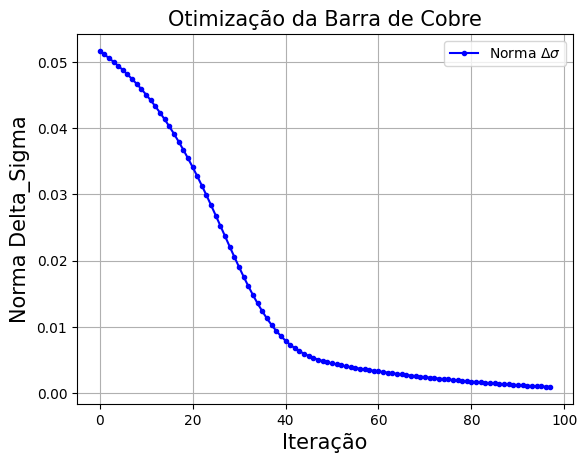

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


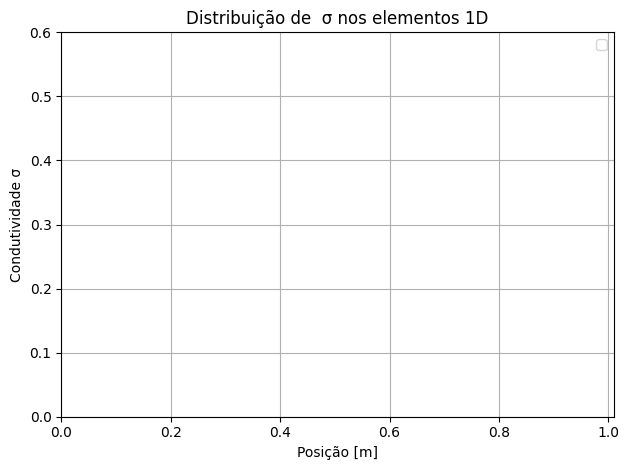

In [3]:
#nome = '../../malhasMSH/unidimensional_100e_py.msh'
nome = '../../malhasMSH/unidimensional_4e_py.msh'

#noh_eletrodos = [0,  10, 20, 30, 40, 50, 60, 70, 80, 90,  100]
noh_eletrodos = [0,  1, 2, 3, 4]

MinhaMalha1D = mesh.PointElectrodes1DMeshEdson(noh_eletrodos, nome_msh=nome, altura1D = 0.02)
MinhaMalha1D.ReadMesh()


meus_sigmas = {}
meus_sigmas[1] = 0.25
meus_sigmas[2] = 0.5
MinhaMalha1D.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

sigma_inicial = np.full(MinhaMalha1D.NumberOfElements, 1.0)          # Monta vetor sigma inicia

amplitude_corrente = 0.001
Pcorrente = np.zeros(MinhaMalha1D.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[0] = -amplitude_corrente                            # Nó de saída de corrente
Pcorrente[MinhaMalha1D.NumberOfElements] = amplitude_corrente                  # Nó de entrada de corrente    

fwd = forwardProblem.forward_problem(MinhaMalha1D, Pcorrente=Pcorrente)   # __init__ roda aqui

fwd.Solve()

#plt.plot(fwd.Vmedido)
print(f'Vmedido \n {fwd.Vmedido.shape}')
nome_arquivo = 'unidimensional_100e_py'

N_padraoCC = 1

##fwd.criar_arquivo_pos_2D(N_padraoCC, fwd.Vmedido, nome_arquivo)
#fwd.criar_arquivo_pos_2D(fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)


V_measured = fwd.Vmedido_eletrodos
invProblem = inverseProblem.inverse_problem(MinhaMalha1D, Pcorrente=Pcorrente)
invProblem.solve(sigma_inicial, V_measured, meus_sigmas)
#print('Y_jacobian',invProblem.Y_jacobian)

## Testes com HUA

In [ ]:
#nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
nome = '../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh'

MinhaMalha = mesh.HuaElectrodes2DMeshEdson(8, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print(MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")


meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
5001 : 0.2, 
5002 : 0.2, 
5003 : 0.2, 
5004 : 0.2, 
5005 : 0.2, 
5006 : 0.2, 
5007 : 0.2, 
5008 : 0.2,  
}

MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

#coordenadas = MinhaMalha.Coordinates
#topologia = MinhaMalha.msh_topology

#MinhaMalha.KGlobal

#KGlobal =  MinhaMalha.KGlobal


print(f'n_nodes = {MinhaMalha.NumberOfNodes}')


fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=0, VirtualNode = True)   # __init__ roda aqui


print(f'Pcorrente \n {fwd.corrente[MinhaMalha.NumberOfNodes-MinhaMalha.NumberOfElectrodes: MinhaMalha.NumberOfNodes]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ8_anom4_tst_Hua_v4_1_lc_0_01'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)



# TESTE COM eletrodo pontual

In [ ]:
nome = '../../malhasMSH/circ16_anomalia6.msh'

MinhaMalhaPto = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto.ReadMesh() 

print(MinhaMalhaPto.Elements[2])
print(f"Centroid: {MinhaMalhaPto.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto.Elements[2].KGeo}")

meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
10001 : 0.2,
10002 : 0.2, 
10003 : 0.2, 
10004 : 0.2, 
10005 : 0.2, 
10006 : 0.2, 
10007 : 0.2, 
10008 : 0.2, 
10008 : 0.2, 
10010 : 0.2, 
10011 : 0.2, 
10012 : 0.2, 
10013 : 0.2, 
10014 : 0.2, 
10015 : 0.2, 
10016 : 0.2,  
}

MinhaMalhaPto.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto.KGlobal =  {MinhaMalhaPto.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto, Pcorrente=None, SkipPattern=3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ16_anomalia6'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)